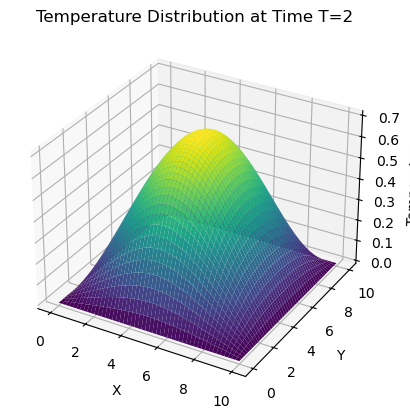

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 参数设置
L = 10  # 正方形区域的边长
N = 50  # 网格点数
dx = L / (N - 1)  # 空间步长
dt = 0.01  # 时间步长
T = 2  # 总模拟时间
alpha = 1  # 热扩散系数

# 初始化温度分布
u = np.zeros((N, N))
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)

# 初始条件函数
def initial_condition(x, y):
    return np.sin(np.pi * x / L) * np.sin(np.pi * y / L)

# 边界条件函数
def boundary_condition(x, y):
    return 0

# 源项函数
def source_term(x, y, t):
    return 0  # 可以根据需要修改

# 五点中心差分格式
def five_point_stencil(u, x, y, t):
    u_new = u.copy()
    for i in range(1, N-1):
        for j in range(1, N-1):
            u_new[i, j] = u[i, j] + alpha * dt * (
                (u[i+1, j] - 2*u[i, j] + u[i-1, j]) / dx**2 +
                (u[i, j+1] - 2*u[i, j] + u[i, j-1]) / dx**2 +
                source_term(x[i], y[j], t)
            )
    return u_new

# 时间演化
u[:, :] = initial_condition(x, y)
timesteps = int(T / dt)

for t in range(timesteps):
    u = five_point_stencil(u, x, y, t * dt)
    # 应用边界条件
    u[0, :] = boundary_condition(x[0], y)
    u[-1, :] = boundary_condition(x[-1], y)
    u[:, 0] = boundary_condition(x, y[0])
    u[:, -1] = boundary_condition(x, y[-1])

# 可视化结果
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Temperature')
plt.title('Temperature Distribution at Time T={}'.format(T))
plt.show()